Task 2.1 

Genetic algorithm to determine the set of (𝑈𝐴)e, (𝑈𝐴)c, and 𝛼 values that best fit the data. <br>
The data was divide into a proper training set (about 80%) and a randomly selected validation <br>
set (about 20%).

In [8]:
'''>>>>> start CodeP1.3F23
    V.P. Carey ME249, Fall 2023''' 

'''Heat pipe performance data for Part 2 of Project 1
   122 data points'''

# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import random
from random import seed
# seed random number generator
seed(1)

#import math and numpy packages
import math
import numpy as numpy
import numpy as np

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 

#import copy
from copy import copy, deepcopy

#create array 
ydata = []

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
# this is an array that is essentially a list of lists

#assembling heat pipe performance data array
#==========================================
#store array where rows are data vectors 
#[Ta,in(deg C), Ta,out(deg C), qdot(W)] 

ydata =     [[ 27.2,     15.9,      31.2]]
ydata.append([ 29.6,     17.1,      37.0])
ydata.append([ 29.5,     18.1,      34.2])
ydata.append([ 30.4,     19.0,      31.])
ydata.append([ 30.4,     20.0,      28.5])
ydata.append([ 30.2,     21.0,      25.7])
ydata.append([ 30.0,     22.1,      22.8])
ydata.append([ 29.8,     22.9,      20.0])
ydata.append([ 29.9,     24.1,      17.1])
ydata.append([ 29.6,     24.9,      14.3])
ydata.append([ 29.5,     26.1,      11.4])
ydata.append([ 30.3,     26.9,       8.6])
ydata.append([ 32.5,     16.9,      45.7])
ydata.append([ 32.6,     18.1,      42.8])
ydata.append([ 32.6,     19.1,      40.0])
ydata.append([ 32.7,     20.2,      37.2])
ydata.append([ 32.9,     21.1,      34.3])
ydata.append([ 33.0,     22.0,      31.5])
ydata.append([ 32.5,     23.1,      28.7])
ydata.append([ 32.8,     24.1,      25.8])
ydata.append([ 33.0,     24.9,      23.0])
ydata.append([ 32.9,     26.0,      20.1])
ydata.append([ 33.1,     27.0,      17.2])
ydata.append([ 35.7,     17.0,      54.4])
ydata.append([ 35.6,     18.1,      51.6])
ydata.append([ 36.2,     19.1,      48.7])
ydata.append([ 36.3,     20.2,      45.9])
ydata.append([ 36.4,     21.1,      43.1])
ydata.append([ 35.5,     22.2,      40.2])
ydata.append([ 36.2,     22.9,      37.4])
ydata.append([ 36.2,     24.1,      34.5])
ydata.append([ 35.7,     25.0,      31.7])
ydata.append([ 36.0,     26.1,      28.8])
ydata.append([ 35.8,     27.1,      25.9])
ydata.append([ 38.8,     16.9,      63.1])
ydata.append([ 39.4,     18.1,      60.3])
ydata.append([ 38.9,     19.2,      57.5])
ydata.append([ 39.2,     20.1,      54.7])
ydata.append([ 38.5,     21.2,      51.8])
ydata.append([ 39.0,     22.0,      49.0])
ydata.append([ 39.0,     23.1,      46.1])
ydata.append([ 39.3,     24.0,      43.3])
ydata.append([ 39.3,     24.9,      40.4])
ydata.append([ 39.1,     26.2,      37.6])
ydata.append([ 39.1,     27.2,      34.7])
ydata.append([ 42.2,     17.0,      71.9])
ydata.append([ 42.3,     18.1,      69.1])
ydata.append([ 42.4,     18.9,      66.3])
ydata.append([ 41.9,     20.0,      63.5])
ydata.append([ 41.8,     21.0,      60.6])
ydata.append([ 41.8,     22.1,      57.8])
ydata.append([ 42.2,     22.8,      54.9])
ydata.append([ 41.5,     24.2,      52.1])
ydata.append([ 42.3,     25.3,      49.2])
ydata.append([ 41.8,     25.9,      46.3])
ydata.append([ 42.3,     26.8,      43.5])
ydata.append([ 45.2,     17.1,      80.8])
ydata.append([ 44.5,     18.2,      78.0])
ydata.append([ 44.8,     18.8,      75.1])
ydata.append([ 45.2,     20.0,      72.3])
ydata.append([ 44.9,     21.2,      69.5])
ydata.append([ 45.3,     22.1,      66.6])
ydata.append([ 44.5,     22.8,      63.8])
ydata.append([ 44.9,     24.1,      60.9])
ydata.append([ 44.8,     25.2,      58.1])
ydata.append([ 45.3,     26.2,      55.2])
ydata.append([ 44.9,     26.9,      52.3])
ydata.append([ 48.0,     17.2,      89.7])
ydata.append([ 47.7,     18.1,      86.9])
ydata.append([ 48.2,     18.9,      84.0])
ydata.append([ 48.3,     19.9,      81.2])
ydata.append([ 48.0,     20.0,      78.3])
ydata.append([ 48.4,     22.8,      75.5])
ydata.append([ 48.2,     23.0,      72.7])
ydata.append([ 47.6,     24.0,      69.8])
ydata.append([ 48.2,     25.1,      66.9])
ydata.append([ 48.2,     25.8,      64.1])
ydata.append([ 47.8,     26.9,      61.2])
ydata.append([ 50.5,     17.0,      98.6])
ydata.append([ 50.6,     18.0,      95.8])
ydata.append([ 50.5,     19.1,      93.0])
ydata.append([ 50.9,     20.1,      90.1])
ydata.append([ 51.0,     20.8,      87.3])
ydata.append([ 51.0,     21.9,      84.4])
ydata.append([ 50.5,     23.0,      81.6])
ydata.append([ 51.2,     24.1,      78.7])
ydata.append([ 50.8,     25.2,      75.9])
ydata.append([ 51.2,     25.9,      73.0])
ydata.append([ 51.0,     26.9,      70.1])
ydata.append([ 54.2,     17.1,     107.6])
ydata.append([ 53.5,     18.1,     104.8])
ydata.append([ 54.1,     19.1,     101.9])
ydata.append([ 53.5,     20.1,      99.1])
ydata.append([ 53.5,     21.2,      96.3])
ydata.append([ 54.2,     21.9,      93.4])
ydata.append([ 54.1,     23.2,      90.6])
ydata.append([ 53.8,     24.1,      87.7])
ydata.append([ 53.6,     25.0,      84.8])
ydata.append([ 53.9,     26.0,      82.0])
ydata.append([ 53.7,     26.8,      79.1])
ydata.append([ 57.2,     17.0,     116.7])
ydata.append([ 56.9,     18.1,     113.8])
ydata.append([ 57.0,     19.1,     111.0])
ydata.append([ 56.7,     19.8,     108.1])
ydata.append([ 57.3,     20.9,     105.3])
ydata.append([ 56.8,     21.9,     102.4])
ydata.append([ 57.4,     23.2,      99.6])
ydata.append([ 57.3,     23.8,      96.7])
ydata.append([ 56.6,     25.2,      93.8])
ydata.append([ 57.0,     25.8,      91.0])
ydata.append([ 57.2,     27.0,      88.1])
ydata.append([ 60.2,     16.9,     125.7])
ydata.append([ 59.9,     17.9,     122.9])
ydata.append([ 59.6,     19.1,     120.0])
ydata.append([ 60.2,     20.1,     117.2])
ydata.append([ 60.2,     20.9,     114.3])
ydata.append([ 60.4,     21.8,     111.5])
ydata.append([ 59.1,     22.9,     108.6])
ydata.append([ 59.1,     24.1,     105.8])
ydata.append([ 60.1,     25.2,     102.9])
ydata.append([ 59.1,     25.8,     100.0])
ydata.append([ 60.3,     26.9,      97.1])
  

# print the data array
#print ('ydata =', ydata)

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]

# print the data array
yarray= numpy.array(ydata)

# =====================================================================
# This section of the code uses a ramdom shuffle to to separate the 
# data into to sets: Training and Validation, 80% and 20%, respectively.
# The section also transforms the units of tempearture from Celcius to 
# Kelvin.
# =====================================================================
# Shuffle the data randomly
np.random.shuffle(yarray)
# Calculate the split index for training and validation
split_index = int(0.8 * len(yarray))
# Split the data into training and validation sets
t_data = yarray[:split_index]
t_data_k = yarray[:split_index]
v_data = yarray[split_index:]
v_data_k = yarray[split_index:]
# Convert temperature from Celcius to Kelvins 
# for calculation uniformity
for i in range (len(t_data)):
    t_data_k[i][1] =  t_data[i][1] + 273
    t_data_k[i][0] = t_data[i][0] + 273
for i in range (len(v_data)):
    v_data_k[i][1] =  v_data[i][1] + 273
    v_data_k[i][0] = v_data[i][0] + 273

# Now, 'training_data' contains 80% of your data, and 'validation_data' contains 20%.

#Parameters for Evolution Loop
#set data parameters
ND = len(t_data)       #number of data vectors in array
DI = 3                 #number of data items in vector
NS = len(t_data)       #total number of DNA strands

#end CodeP1.1F23

The objective here is to use machine-learning tools to determine<br> 
the design and optimization of a heat pipe heat exchanger (HPHE)<br> 
used for cooling electronic components within a cabinet. While a <br>
detailed physics-based model can be constructed to account for <br>
various factors such as wick flow, heat transport, and fluid <br>
properties, a simplified model can often suffice for well-designed<br>
heat pipes

Added section:
 * For Loop for running multiple sets
 * Calculation of RMSE training & validation
 * Calculation of MAE validation
 * Plot of q' predicted v. data training & validation data
 * Results table at the end

RMSE training:  2377.528047377451
RMSE Validation:  [2226.18678247]


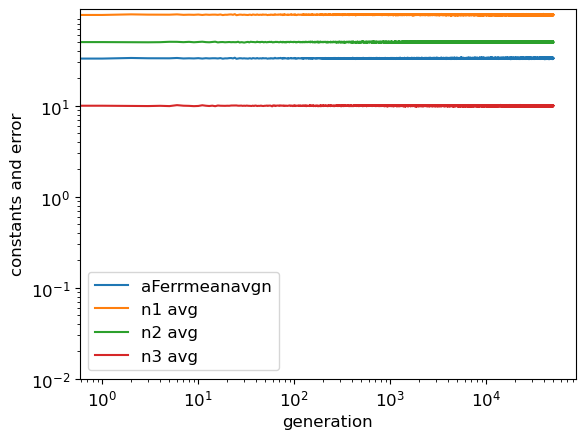

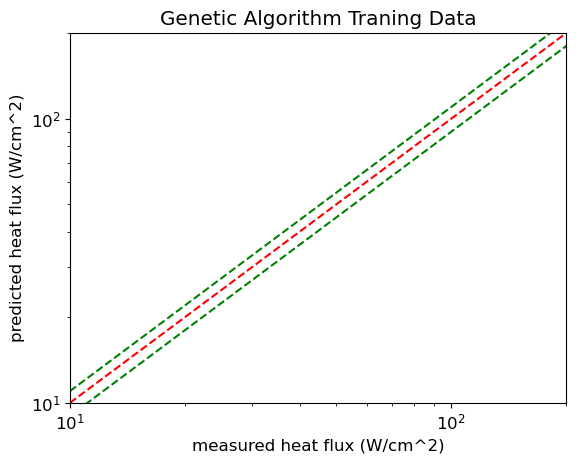

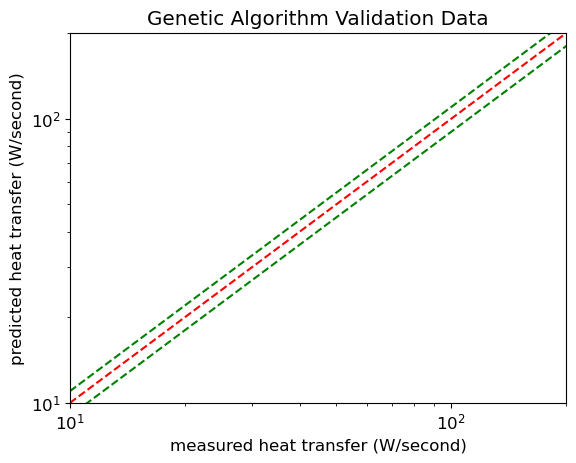

Initial values for n1, n2, n3:
n1i       n2i       n3i       
100.00    50.00     10.00     
Minimum values for n1, n2, n3:
n1min     n2min     n3min     
97.74     50.30     9.98      
Average values for n1, n2, n3:
n1avg[k]  n2avg[k]  n3avg[k]  
100.24    49.82     9.98      
RMSE & MAE for Training and Validation Data:
p         NGEN      RMSE t    MAE t     RMSE v    MAE v     
0.09      50000     2377.53   32.4068   


In [9]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 

'''INITIALIZING PARAMETERS'''

# ==================================================================
# Chage to original code. Define a list with the goal to evalute
# different initial guesses in a for loop
# ==================================================================
# Define a list of n values, perturbation, and NGEN to evaluate
n_values_to_evaluate = [
    [(-1, 100.0, 50.00, 10.0, 0.0, 0.0), 0.09, 50000], # original
#     [(-1, 3.500, 50.00, 22.0, 0.0, 0.0), 0.09, 6000],
#     [(-1, 10.00, 50.00, 22.0, 0.0, 0.0), 0.09, 6000],
#     [(-1, 3.500, 100.0, 2.00, 0.0, 0.0), 0.09, 6000],
#     [(-1, 3.500, 3.000, 0.00, 0.0, 0.0), 0.09, 6000],
]

# Create an empty list to store summaries
results = []

# ==================================================================
# Change to original code. Section added to initiate For Loop to
# iterate through n number of initial guessses and define their
# parameters
# ==================================================================

# ==================================================================
# Create Variables for the Bolztmann constt
# & the reference convective heat transfer 
# coefficient for the fin section
# ==================================================================
Bolt = 5.67 * 10 **-8
hc = 70

# For Loop initiation
for n_values, perturbation, NGEN in n_values_to_evaluate:
    
    n = []
    ntemp = []
    gen=[0]
    n1avg = [0.0]
    n2avg = [0.0]
    n3avg = [0.0]
    n4avg = [0.0]
    n5avg = [0.0]
    meanAFerr=[0.0]
    aFerrmeanavgn=[0.0] 
    rms_dev = [0.0] # Initialize rms_dev
    rms_dev_val = [0.0] # Initialize rms_dev_val

    # Set program parameters
    NGEN = NGEN      # number of generations (steps)
    MFRAC = 0.5   # faction of median threshold
    perturbation = perturbation # pertubation value

    # here the number of data vectors equals the number of DNA strands (or organisms)
    # they can be different if they are randomly paired to compute Ferr (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array stores the
        meanAFerr.append(0.0)
        aFerrmeanavgn.append(0.0)
        n1avg.append(0.0)
        n2avg.append(0.0)
        n3avg.append(0.0)
        n4avg.append(0.0)
        n5avg.append(0.0)

    '''guesses for initial solution population'''
    n0i, n1i, n2i, n3i, n4i, n5i = n_values # Assign values from the array

    #- initialize arrays before start of evolution loop EL
    #then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

    #i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
    n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
    for i in range(ND):
        n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
    #print (n) # uncomment command to print array so it can be checked

    # store also in wtemp
    ntemp = deepcopy(n)

    #initialize Ferr values an dother loop parameters
    #define arrays of Ferr (error) functions
    #individual solution error and absoute error
    Ferr =  [[0.0]]  
    #population average solution error and absoute error
    Ferravgn =  [[0.0]]
    aFerr =  [[0.0]]
    aFerravgn =  [[0.0]]

    #store zeros in ND genes
    for i in range(ND-1):
        #individual solution error and absoute error
        Ferr.append([0.0])
        aFerr.append([0.0])
        #population average solution error and absoute error
        Ferravgn.append([0.0])
        aFerravgn.append([0.0])
        #====================================
        # New array rms_dev training data
        rms_dev.append([0.0])
        # New array rms_dev Validation data
        rms_dev_val.append([0.0])
        #====================================

    aFerrmeanavgnMin = 1000000000.0 
    # these store the  n values for minimum population average error durng NGEN generations
    n1min = 0.0
    n2min = 0.0
    n3min = 0.0
    n4min = 0.0
    n5min = 0.0
    aFerrta = 0.0
    # these store the time averaged n values durng from generation 800 to NGEN generations
    n1min = 0.0
    n1ta = 0.0
    n2ta = 0.0
    n3ta = 0.0
    n4ta = 0.0
    n5ta = 0.0

    '''START OF EVOLUTION LOOP'''
    # ------------------------------------------
    # k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
    for k in range(NGEN):

        '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
        number of data points ND so for each generation, each solution can be compared to a different 
        data point and all the data is compared in each generation.  The order of the solutions in the array 
        that holds the solution constants is constantly changing due to mating and selection, so the pairing 
        is random.'''


        '''CALCULATING ERROR (FITNESS)
        In this program, the absolute error in the logrithm of the physical heat flux is 
        used to evaluate fitness.'''

        # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
        # for specified n(i), and calculate (mean aFerr) = aFerrmean
        # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
        # Note that the number data points ND equals the number of solutions (organisms) in the population
        #====================================================================================
        '''CALCULATING ERROR (FITNESS)'''
        for i in range(ND):
            # ==============================================================
            # New function error equation to accomodate HPHE error function
            # ==============================================================
            # Calculate the temperature difference
            diff_t = (t_data[i][0] - t_data[i][1])
            # Calculate the temperature sum
            sum_t = (t_data_k[i][0] + t_data_k[i][1])
            # Calculate the sum of the temperature to the power 3
            t_p3 = (t_data_k[i][0])**2 + (t_data_k[i][1])**2
            # Calculate hr
            hr = n[i][2] * (1+ (1/hc)*n[i][3]* (Bolt)*((sum_t))*(t_p3))
            # Compute error function
            Ferr[i] = t_data[i][2] - (hr * (n[i][1] * diff_t)/(n[i][1] + hr))
            # ==============================================================
            # New absolute fractional error equation to accomodate HPHE error function
            # ==============================================================
            aFerr[i] = abs(Ferr[i])/abs(t_data[i][2])  #- absolute fractional error
            
        #-------------
        aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
        meanAFerr[k]= aFerrmean  #store aFerrmean for this generation gen[k]=k
        aFerrmedian = numpy.median(aFerr) #median error for population for this generation

        '''SELECTION'''
        #pick survivors 
        #[2] calculate survival cutoff, set number kept = nkeep = 0
        #==============================================
        clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
        nkeep = 0

        # now check each organism/solution to see if aFerr is less than cut of limit
        #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
        #and number of new offspring = NS-nkeep
        #==============================================
        for j in range(NS):  # NS Ferr values, one for each solution in population
            if (aFerr[j] < clim):
                nkeep = nkeep + 1
                #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
                ntemp[nkeep-1][1] = n[j][1];
                ntemp[nkeep-1][2] = n[j][2];
                ntemp[nkeep-1][3] = n[j][3];
                ntemp[nkeep-1][4] = n[j][4];
                ntemp[nkeep-1][5] = n[j][5];
        #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
        #compute number to be added by mating
        nnew = NS - nkeep  

        '''MATING'''
        #[4] for nnew new organisms/solutions,
        # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
        #==============================================================
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = np.random.randint(low=0, high=nkeep+1)
            nmate2 = np.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
            #if (numpy.random.rand() < 0.5)
            #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
            #else
            #    ntemp[nkeep+j+1][0] = n[nmate2][0]
            
            # ===================================================================
            # Change to original code. 0.09 substitute by "perturbation" variable
            # ===================================================================

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 1, mutation added
            else:
                ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 2, mutation added
            else:
                ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+perturbation*2.*(0.5-numpy.random.rand()))
            '''   
            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+perturbation*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+perturbation*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+perturbation*2.*(0.5-numpy.random.rand()))
            '''
        #=============================================
        n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)


        '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
        # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
        # at this generation k
        #=============================================
        #initialize average n's to zero and sum contribution of each member of the solution population 
        n1avg[k] = 0.0;
        n2avg[k] = 0.0;
        n3avg[k] = 0.0;
        n4avg[k] = 0.0;
        n5avg[k] = 0.0;
        for j in range(NS):    
            n1avg[k] = n1avg[k] + n[j][1]/NS; 
            n2avg[k] = n2avg[k] + n[j][2]/NS; 
            n3avg[k] = n3avg[k] + n[j][3]/NS;
            n4avg[k] = n4avg[k] + n[j][4]/NS;
            n5avg[k] = n5avg[k] + n[j][5]/NS;

        # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
        # for this solutions generation k
        # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
        # 
        #=============================================
        ''' CALCULATING MEAN ERROR FOR POPULATION'''
        for i in range(ND):
            # ==============================================================
            # New average function error equation to accomodate HPHE error function
            # ==============================================================
            # Calculate the temperature difference
            diff_t = (t_data[i][0] - t_data[i][1])
            # Calculate the temperature sum
            sum_t = (t_data_k[i][0] + t_data_k[i][1])
            # Calculate the sum of the temperature to the power 3
            t_p3 = (t_data_k[i][0])**3 + (t_data_k[i][1])**3
            # Calculate hr
            hr_avg = n2avg[k] * ( 1 + (1/hc) * n3avg[k] * (Bolt)*((sum_t))*(t_p3))
            # Compute average error function
            Ferravgn[i] = t_data[i][2] - (hr_avg * (n1avg[k] * diff_t)/(n1avg[k] + hr_avg))
            # ==============================================================
            # New average absolute error equation to accomodate HPHE error function
            # ==============================================================
            aFerravgn[i] = abs(Ferravgn[i])/abs(t_data[i][2])
        #-------------
        aFerrmeanavgn[k] = numpy.mean(aFerravgn)

        # next, update time average of n valaues in population (n1ta[k], etc.) 
        # for generations = k > 800 up to total NGEN
        #=============================================
        aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
        if (k > 800):
            n1ta = n1ta + n1avg[k]/(NGEN-800)
            n2ta = n2ta + n2avg[k]/(NGEN-800)
            n3ta = n3ta + n3avg[k]/(NGEN-800)
            n4ta = n4ta + n4avg[k]/(NGEN-800)
            n5ta = n5ta + n5avg[k]/(NGEN-800)

        # compare aFerrmeanavgn[k] to previous minimum value and save 
        # it and corresponding n(i) values if the value for this generation k is lower 
        #=============================================
        if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
            aFerrmeanavgnMin = aFerrmeanavgn[k] 
            n1min = n1avg[k]
            n2min = n2avg[k]
            n3min = n3avg[k]
            n4min = n4avg[k]
            n5min = n5avg[k]

        #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
        #print ('kvalue =', k)
        '''end of evolution loop'''
        # ------------------------------------------------------------------
        # ------------------------------------------------------------------

    # ------------------------------------------------------------------
    #final print and plot of results
    # ------------------------------------------------------------------
#     print('Initial Values:', n1i, n2i, n3i)
#     print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
#     print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
#     print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

    #SETTING UP PLOTS

    # ==================================================================
    # Change to original code. Calculating predicted and RMSE with
    # respect to the data
    # ==================================================================
    
    # ================================
    #RMS calculation for Traning Data
    # ================================
    #initialize values
    qpppred =  [[0.0]]
    qppdata =  [[0.0]]
    for i in range(ND-1):
        qpppred.append([0.0])
        qppdata.append([0.0])       
    # Calculate predicted and data values to plot    
    for i in range(ND):
        # Calculate the temperature difference
        diff_t = (t_data[i][0] - t_data[i][1])
        # Calculate the temperature sum
        sum_t = (t_data_k[i][0] + t_data_k[i][1])
        # Calculate the sum of the temperature to the power 2
        t_p3 = (t_data_k[i][0])**3 + (t_data_k[i][1])**3
        # Calculate hr
        hr_min = n2min * (1 + (1/hc) * n3min * (Bolt) * ((sum_t)) * (t_p3))
        # Compute q' predicted
        qpppred[i] = hr_min * n1min * diff_t/(n1min + hr_min)
        qppdata[i] = t_data[i][2]      
    #Calculationg RMS btw data and predicted
    for i in range(ND):
        rms_dev[i] = (numpy.array(qppdata[i]) - numpy.array(qpppred[i]))**2
    rms_dev = numpy.sqrt(numpy.sum(rms_dev) / ND)
    print('RMSE training: ', rms_dev)
    
    # ===================================   
    #RMS calculation for Validation Data
    # ===================================
    #initialize values
    qpppred_val =  [[0.0]]
    qppdata_val =  [[0.0]]
    for i in range(len(v_data)-1):
        qpppred_val.append([0.0])
        qppdata_val.append([0.0])       
    # Calculate predicted and data values to plot    
    for i in range(len(v_data)):
        # Calculate the temperature difference
        diff_t = (v_data[i][0] - v_data[i][1])
        # Calculate the temperature sum
        sum_t = (v_data_k[i][0] + v_data_k[i][1])
        # Calculate the sum of the temperature to the power 2
        t_p3 = (v_data_k[i][0])**3 + (v_data_k[i][1])**3
        # Calculate hr
        hr_min = n2min * (1 + (1/hc) * n3min * (Bolt) * ((sum_t)) * (t_p3))
        # Compute q' predicted
        qpppred_val[i] = hr_min * n1min * diff_t/(n1min + hr_min)
        qppdata_val[i] = v_data[i][2]      
    #Calculationg RMS btw data and predicted
    for i in range(len(v_data)):
        rms_dev_val[i] = (numpy.array(qppdata_val[i]) - numpy.array(qpppred_val[i]))**2
    rms_dev_val = numpy.sqrt(numpy.sum(rms_dev_val) / len(v_data))
    print('RMSE Validation: ', rms_dev_val)
    
    #''' CALCULATING MEAN ERROR FOR POPULATION'''    
    Ferravgn_val = [[0.0]]
    aFerravgn_val =  [[0.0]]
    aFerrmeanavgn_val= [[0.0]]    
    for i in range(len(v_data)-1):       
        Ferravgn_val.append([0.0])
        aFerravgn_val.append([0.0])
        Ferravgn_val.append([0.0])
    for i in range(len(v_data)): 
        # Calculate the temperature difference
        diff_t = (v_data[i][0] - v_data[i][1])
        # Calculate the temperature sum
        sum_t = (v_data_k[i][0] + v_data_k[i][1])
        # Calculate the sum of the temperature to the power 3
        t_p3 = (v_data_k[i][0])**3 + (v_data_k[i][1])**3
        # Calculate hr
        hr_avg = n2min * (1 + (1/hc) * n3min * (Bolt) * ((sum_t)) * (t_p3))
        
        Ferravgn_val[i] = v_data[i][2] - (hr_avg * n1min * diff_t/(n1min + hr_avg))
        aFerravgn_val[i] = abs(Ferravgn_val[i])/abs(v_data[i][2])
        #-------------
    aFerrmeanavgn_val = numpy.mean(aFerravgn_val)
    
    # After calculating n1min, n2min, n3min, and rms_dev, create a dictionary to store these values
    iteration_result = {
        'Set': len(results) + 1,
        'n1i': n1i,
        'n2i': n2i,
        'n3i': n3i,
        'n1min': n1min,
        'n2min': n2min,
        'n3min': n3min,
        'n1avg[k]' : n1avg[k],
        'n2avg[k]' : n2avg[k],
        'n3avg[k]' : n3avg[k],
        'p': perturbation,
        'NGEN': NGEN,
        'rms_dev': rms_dev,
        'rms_dev_val': rms_dev_val,
        'MAE_v': aFerrmeanavgn_val,
        'aFerrmeanavgnMin': aFerrmeanavgnMin,
        # Add more values as needed
    }
    
    results.append(iteration_result)  # Append the summary dictionary to the list
    #========

    # constants evolution plots
    # x axis values are generation number 
    # corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
    # plotting the points  

    plt.rcParams.update({'font.size': 12})

    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # computed using the mean n values
    plt.plot(gen, aFerrmeanavgn) 
    plt.plot(gen, n1avg)
    plt.plot(gen, n2avg)
    plt.plot(gen, n3avg)
    plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
    
    # naming the x axis 
    plt.xlabel('generation') 
    # naming the y axis 
    plt.ylabel('constants and error') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000]) 
    plt.show() 


    '''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
    
    # Adding y=k*x for k=1
    x_values = numpy.logspace(0, 3, 100)   # Adjust the range of x values as needed
    y_values = x_values                     # y = k*x
    y_values1 = x_values + (0.1 * x_values) # y = k*x + 0.1*x (+10% uncertainty)
    y_values2 = x_values - (0.1 * x_values) # y = k*x - 0.1*x (-10% uncertainty)
    
    plt.plot(x_values, y_values1, color='green', linestyle='--', label='y = k*x + 0.1*x')
    plt.plot(x_values, y_values2, color='green', linestyle='--', label='y = k*x - 0.1*x')
    plt.plot(x_values, y_values, color='red', linestyle='--', label='y = k*x')
    
    # Plot Heat Flux data vs. predicted
    plt.scatter(qppdata, qpppred, label='Data', color='blue', alpha=0.7)
    plt.title('Genetic Algorithm Traning Data')
    plt.xlabel('measured heat flux (W/cm^2)')
    plt.ylabel('predicted heat flux (W/cm^2)')
    plt.loglog()
    plt.xlim(xmax = 200, xmin = 10)
    plt.ylim(ymax = 200, ymin = 10)

    plt.show()
    
    # Plotting for Validation Data
    
    '''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
    # ============================================================================
    # Change to original code. Adding perfect algorithm prediction reference line
    # and +/-10% uncertainty boundaries
    # ============================================================================
    x_values = numpy.logspace(0, 3, 100)    # Adjust the range of x values as needed
    y_values = x_values                     # y = x for a slope of 1
    y_values1 = x_values + (0.1 * x_values)
    y_values2 = x_values - (0.1 * x_values)
    # Plot reference equations
    plt.plot(x_values, y_values1, color='green', linestyle='--', label='Slope 1 Line')
    plt.plot(x_values, y_values2, color='green', linestyle='--', label='Slope 1 Line')
    plt.plot(x_values, y_values, color='red', linestyle='--', label='Slope 1 Line')
    '''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
    # Scatter plot for qppred and qppdata
    plt.scatter(qppdata_val, qpppred_val, label='Data', color='blue', alpha=0.7)
    plt.title('Genetic Algorithm Validation Data')
    plt.xlabel('measured heat transfer (W/second)')
    plt.ylabel('predicted heat transfer (W/second)')
    plt.loglog()
    plt.xlim(xmax = 200, xmin = 10)
    plt.ylim(ymax = 200, ymin = 10)

    plt.show()
    
# Table of Results
print("Initial values for n1, n2, n3:")
print(f"{'n1i':<10}{'n2i':<10}{'n3i':<10}")
for result in results:
    print(f"{result['n1i']:<10.2f}{result['n2i']:<10.2f}{result['n3i']:<10.2f}")
    
print("Minimum values for n1, n2, n3:")
print(f"{'n1min':<10}{'n2min':<10}{'n3min':<10}")
for result in results:
    print(f"{result['n1min']:<10.2f}{result['n2min']:<10.2f}{result['n3min']:<10.2f}")

print("Average values for n1, n2, n3:")
print(f"{'n1avg[k]':<10}{'n2avg[k]':<10}{'n3avg[k]':<10}")
for result in results:
    print(f"{result['n1avg[k]']:<10.2f}{result['n2avg[k]']:<10.2f}{result['n3avg[k]']:<10.2f}")

print("RMSE & MAE for Training and Validation Data:")
# print(f"{'p':<10}{'NGEN':<10}{'RMSE training':<10}{'MAE trainig':<10}{'RMSE validation':<10}{'MAE validation':<10}")
print(f"{'p':<10}{'NGEN':<10}{'RMSE t':<10}{'MAE t':<10}{'RMSE v':<10}{'MAE v':<10}")
for result in results:
    print(f"{result['p']:<10.2f}{result['NGEN']:<10}{result['rms_dev']:<10.2f}{result['aFerrmeanavgnMin']:<10.4f}")

# end CodeP1.2F23 


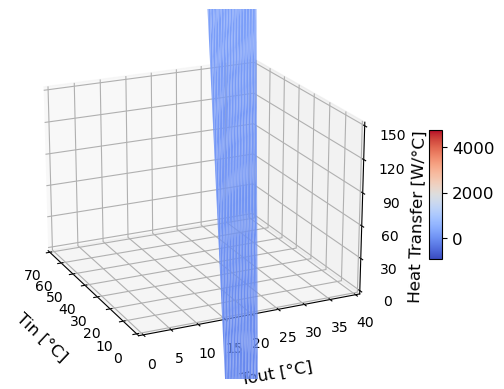

In [10]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FuncFormatter, MaxNLocator

# Define a custom formatting function to round to a specific number of significant figures
def format_z(value, _):
    # Specify the number of significant figures you want (e.g., 3)
    num_significant_figures = 3
    return f"{value:.{num_significant_figures}g}"
    
# Define the range of X and Y values
X = numpy.linspace(20,60,100) # Tin
Y = numpy.linspace(10,30,100) # Tout
X, Y = numpy.meshgrid(X, Y)

# Calculate Z using your equation
hr_min = n2min * (1 + ((1 / hc) * n3min * Bolt * ((X + 273) + (Y + 273) * ((X +273)**3 + (Y + 273)**3))))
t_dif = X - Y
Z = hr_min * n1min * t_dif / (n1min + hr_min)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
fig.colorbar(surf, shrink=0.35, aspect=10, pad=0.1)

# Set labels for the axes
ax.set_xlabel('Tin [°C]', fontsize=12, labelpad=10)
ax.set_ylabel('Tout [°C]', fontsize=12, labelpad=10)
ax.set_zlabel('Heat Transfer [W/°C]', fontsize=12, labelpad=2)

# Set limits for the axes
ax.set_xlim(70.0, 0.0)
ax.set_ylim(0.0, 40.0)
ax.set_zlim(0, 150)

# ax.zaxis.set_major_locator(LinearLocator(10))
# Reduce the number of ticks on the z-axis
ax.zaxis.set_major_locator(MaxNLocator(nbins=5))

# Customize tick formatting for z-axis using the custom formatting function
ax.zaxis.set_major_formatter(FuncFormatter(format_z))

# Customize tick formatting for z-axis
ax.tick_params(axis='both', which='major', labelsize=10)

# Set the view perspective to orient the plot
ax.view_init(elev=20, azim=-25)  # Adjust the angles as needed

# Show the plot
plt.show()